<a href="https://colab.research.google.com/github/Zwarzen/PCVK_Genap_2022/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Praktikum 1

Kontras adalah tingkat penyebaran pixel-pixel dalam intensitas warna

g(x*y) = a*f(x,y)+b

- g(x,y) = nilai pixel stelah transformasi
- f(x,y) = nilai pixel asli
- a = nilai kontras
- b = nilai brightness

 Mengubah tingkat kecerahan citra
---------------------------------
Masukan nilai kecerahan : 40


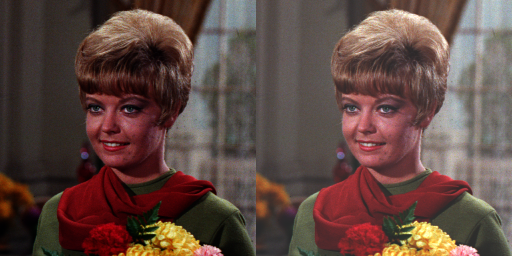

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
    brightness = int(input('Masukan nilai kecerahan : '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum 1

Implementasikan transformasi logarithmic brightness pada Google Colaboratory 
menggunakan formula yang terdapat pada bagian Ulasan Teori

Mengubah tingkat kecerahan citra
--------------------------------
Masukan nilai kecerahan(-255 - 255): 60
Masukan nilai kontras(1.0 - 3.0): 1.5


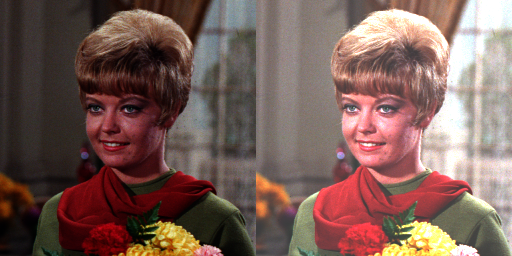

In [12]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  kecerahan = int(input('Masukan nilai kecerahan(-255 - 255): '))
  kontras = float(input('Masukan nilai kontras(1.0 - 3.0): '))
except:
  print('Error, values is not number')

foto = cv.imread('/content/drive/MyDrive/Images/female.tiff')
kecerahan_gambar = np.zeros(foto.shape, foto.dtype)

#Accessing pixels
for y in range(foto.shape[0]):
  for x in range(foto.shape[1]):
    for c in range(foto.shape[2]):
      kecerahan_gambar[y,x,c] = np.clip(kontras * foto[y,x,c] + kecerahan, 0, 255)

# simpler function to accesing pixels  
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((foto, kecerahan_gambar))
cv2_imshow(final_frame)

# Tugas Praktikum 2
Implementasikan transformasi grayscale menggunakan metode averaging, lightness, 
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada 
bagian Ulasan Teori

In [15]:
import matplotlib.pyplot as plt
from scipy import misc

- Average Grayscale

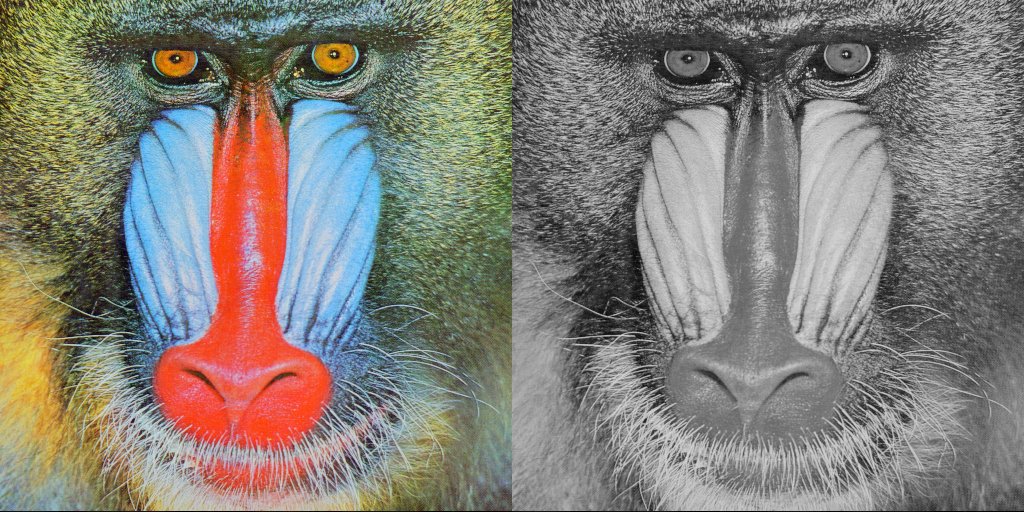

In [81]:
foto2 = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
avg_grayscale = np.zeros(foto2.shape, foto2.dtype)

x,y,z=avg_grayscale.shape # kumpulan array sumbu

avg_grayscale[:] = foto2.mean(axis=-1,keepdims=1) 

# axis : berguna sebagai definisi sumbu
# keepdims : -

final_frame = cv.hconcat((foto2, avg_grayscale))
cv2_imshow(final_frame)

- Lightness

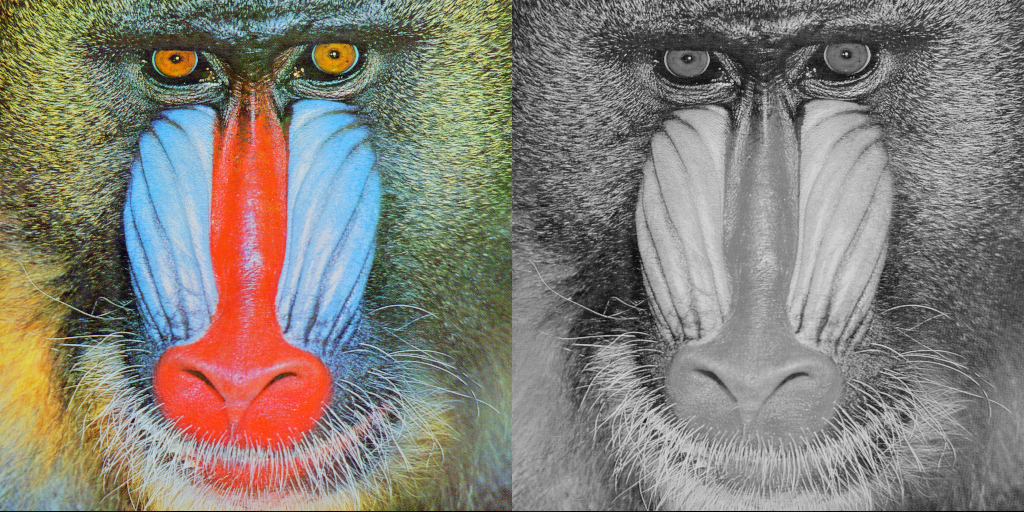

In [50]:
lightness_grayscale = np.zeros(foto2.shape, foto2.dtype)

lightness_grayscale[:] = np.max(foto2,axis=-1,keepdims=1)/2+np.min(foto2,axis=-1,keepdims=1)/2 # rumus Grayscale Lightness
# axis=-1,keepdims=1 : sebagai def rgb

final_frame = cv.hconcat((foto2, lightness_grayscale))
cv2_imshow(final_frame)

- Luminance

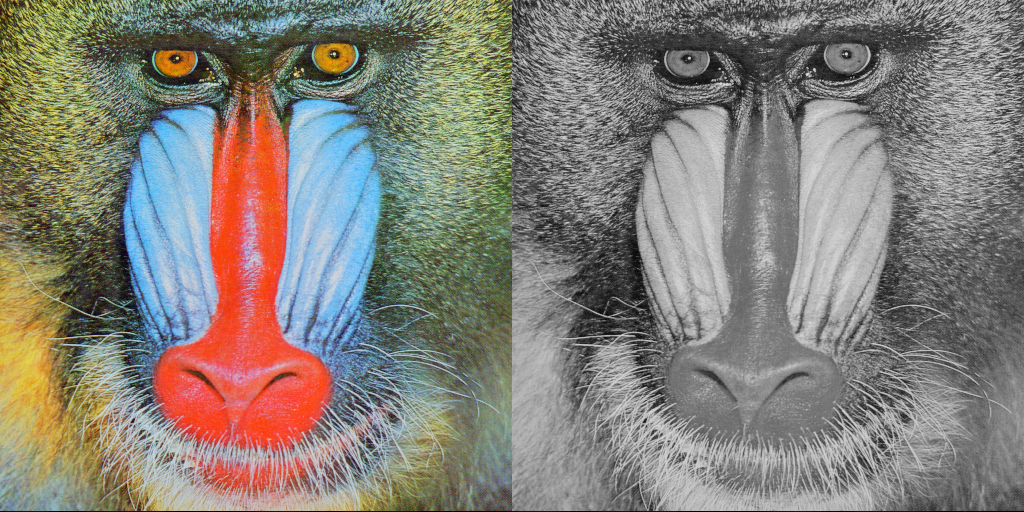

In [56]:
luminance_grayscale = np.zeros(foto2.shape, foto2.dtype)

W = [0.2,0.5,0.3] # W = Pemberat Warna
W_mean = np.tensordot(foto2,W, axes=((-1,-1)))[...,None] # rtensordot : -
luminance_grayscale[:] = W_mean.astype(foto2.dtype)

final_frame = cv.hconcat((foto2, luminance_grayscale))
cv2_imshow(final_frame)

- Warna Merah

In [66]:
foto2[495:505,390:405] # menncari array warna RGB

array([[[166, 183, 156],
        [133, 175, 168],
        [ 64, 129, 147],
        [ 51,  97, 102],
        [ 71, 125, 109],
        [ 71, 138, 145],
        [ 75, 147, 138],
        [ 69, 132, 129],
        [ 46, 108, 135],
        [ 51, 124, 117],
        [ 58, 125, 125],
        [ 72, 120, 142],
        [ 63, 102, 115],
        [ 56, 107,  99],
        [ 82, 121, 128]],

       [[155, 176, 145],
        [112, 175, 174],
        [ 80, 156, 161],
        [ 83, 150, 141],
        [ 75, 144, 144],
        [ 82, 140, 130],
        [ 68, 120, 136],
        [ 65, 115, 119],
        [ 52,  92, 116],
        [ 46, 109, 110],
        [ 94, 148, 151],
        [101, 147, 134],
        [ 66, 136, 107],
        [ 83, 118, 113],
        [ 73, 116, 116]],

       [[144, 170, 153],
        [115, 170, 164],
        [ 83, 157, 150],
        [ 73, 144, 152],
        [ 60, 142, 139],
        [ 58, 123, 133],
        [ 55, 109, 111],
        [ 41,  78, 104],
        [ 31,  88,  96],
        [ 40,  58,  8

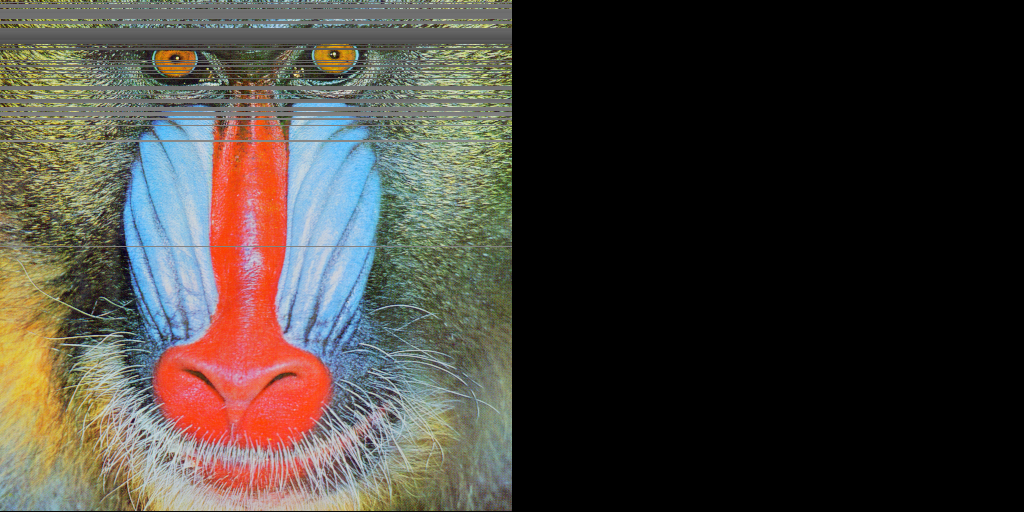

In [70]:
one_color = np.zeros(foto2.shape, foto2.dtype)

# menngambil min dari warna Red sebagai patokan warna yang diincar
for i in range(x):
    for j in range(y):
        if (foto2[i,0,0]<40):
            foto2[i]= np.mean(foto2[i])

final_frame = cv.hconcat((foto2, one_color))
cv2_imshow(final_frame)